In [42]:
figures_dir = '/Users/peterwills/google-drive/Research/Graph Distance Study/metrics_paper/figures'

# ABIDE Structures

Looking for other ways of distinguishing the two sets in the ABIDE dataset. We'll work on the signed correlation, rather than the absolute value.

In [1]:
from scipy import io as sio

In [13]:
input_data_dir = './data/'

abide_data = sio.loadmat(os.path.join(input_data_dir,'abide_connectivity.mat'))
correlations = np.abs(abide_data['correlation'])
ASD_mask = (abide_data['diagnosis'] - 1).flatten()
TD_mask = [bool(item) for item in 1-ASD_mask]
ASD_mask = [bool(item) for item in ASD_mask]

ASD_brains = list(correlations[ASD_mask,:,:])
TD_brains = list(correlations[TD_mask,:,:])

In [14]:
correlations.shape

(871, 116, 116)

In [35]:
TD_mean, TD_std = np.mean(TD_brains,axis=0), np.std(TD_brains,axis=0)

In [36]:
ASD_scaled = [(mat - TD_mean) / TD_std for mat in ASD_brains]
ASD_scaled = np.mean(ASD_scaled,axis=0)

This is a plot of how many standard deviations from the mean each correlation of the TD brain is (relative to the ASD brains).

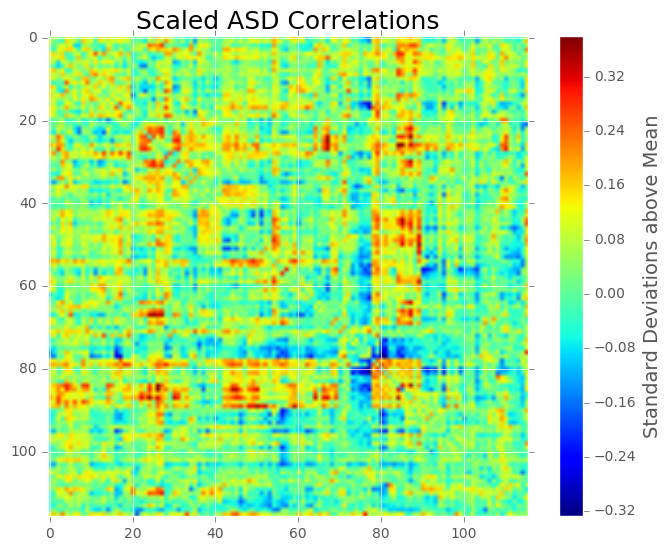

In [45]:
plt.imshow(ASD_scaled);
plt.colorbar(label='Standard Deviations above Mean');
plt.title('Scaled ASD Correlations')

fig = plt.gcf();
fig.savefig(os.path.join(figures_dir,'asd_correlations.pdf'),dpi=300,bbox_inches='tight');

We see higher correlations just after 80, and lower just before; let's nail down these regions specifically.

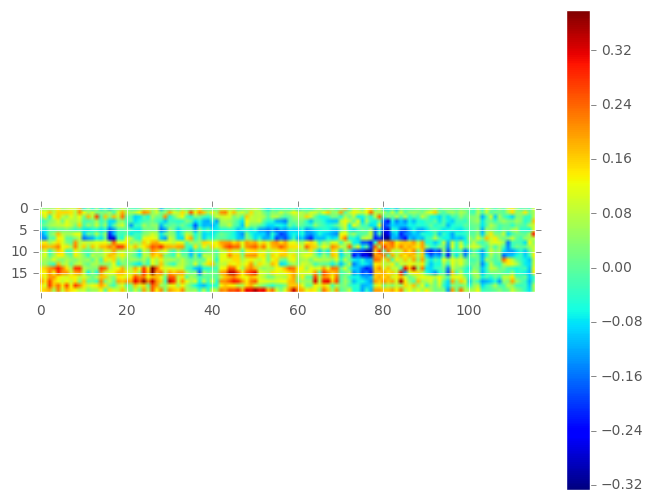

In [38]:
plt.imshow(ASD_scaled[70:90,:],interpolation=None);
plt.colorbar();

In [49]:
degree = pd.Series(ASD_scaled.mean(axis=0))

In [50]:
degree.sort_values()

75    -0.053834
77    -0.037739
103   -0.037680
76    -0.031606
114   -0.028811
95    -0.019200
113   -0.017518
73    -0.016522
93    -0.015934
112   -0.011817
74    -0.011401
91    -0.008797
53    -0.005180
56    -0.004197
35     0.003447
57     0.004343
92     0.005630
104    0.010564
100    0.011297
99     0.011448
70     0.013424
62     0.014482
111    0.015093
60     0.017276
63     0.017948
90     0.019931
41     0.021196
21     0.021817
51     0.021972
80     0.022469
         ...   
45     0.062008
48     0.063161
25     0.063489
59     0.063616
17     0.063679
43     0.063774
15     0.063776
9      0.067117
3      0.067279
44     0.067378
49     0.068358
28     0.070078
50     0.070602
8      0.072433
19     0.079034
78     0.083343
115    0.083405
5      0.084533
71     0.084788
84     0.085214
86     0.085780
85     0.090739
54     0.092313
4      0.092785
24     0.099868
87     0.104582
89     0.106332
27     0.108583
79     0.123662
26     0.137027
Length: 116, dtype: floa

Lower connectivity in regions 73-77, higher in regions 79 & 84-89. For reference, here are the relevant regions of the AAL: 

    73. Putamen_L
    74. Putamen_R
    75. Pallidum_L
    76. Pallidum_R
    77. Thalamus_L
    78. Thalamus_R
    79. Heschl_L
    80. Heschl_R
    81. Temporal_Sup_L
    82. Temporal_Sup_R
    83. Temporal_Pole_Sup_L
    84. Temporal_Pole_Sup_R
    85. Temporal_Mid_L
    86. Temporal_Mid_R
    87. Temporal_Pole_Mid_L
    88. Temporal_Pole_Mid_R
    89. Temporal_Inf_L 

# Thresholded, binary graphs

In [20]:
def mask(matrix,threshold,ones=False):
    """Threshold an input matrix.
    
    Parameters
    ----------
    matrix : numpy array
        The matrix to be thresholded
        
    threshold : float
        Entries of matrix below threshold will be set to zero
        
    ones : Boolean (optional, default = False)
        If true, then entries above threshold are set to one. Otherwise, they are not modified.
        
    Returns
    -------
    masked : numpy array
        The input matrix, with entries below threshold set to zero.
    """
    if ones:
        masked = np.where(matrix > threshold, np.ones(matrix.shape), np.zeros(matrix.shape))
    else:
        masked = np.where(matrix > threshold, matrix, np.zeros(matrix.shape))
    return masked

In [22]:
# now use absolute values
ASD_brains = np.abs(correlations[ASD_mask,:,:])
TD_brains = np.abs(correlations[TD_mask,:,:])

In [39]:
ones = True
T = 0.5
ASD_masked = mask(ASD_brains,T,ones)
TD_masked = mask(TD_brains,T,ones)

In [40]:
TD_mean, TD_std = np.mean(ASD_masked,axis=0), np.std(ASD_masked,axis=0)
TD_shifted = TD_masked - TD_mean

This plot is **the difference in probability of a link being present in TD vs ASD connectome**. Probability is with respect to a random draw from the dataset.

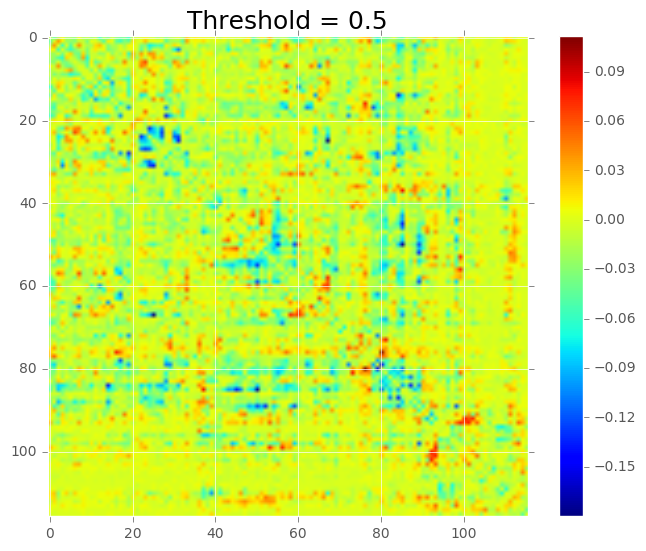

In [41]:
plt.imshow(np.mean(TD_shifted,axis=0));
plt.colorbar();
plt.title('Threshold = {}'.format(T));